# Down model về

In [1]:
import torch
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision

use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-256',
                       pretrained=True, useGPU=use_gpu)
# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)


Using cache found in /home/jovyan/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


# tạo ra latent vector, vẽ hình

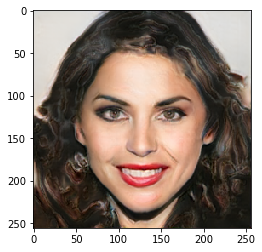

In [3]:
z = torch.zeros(1,model.config.noiseVectorDim)

gen_image = model.test(z)

#print(gen_image)

grid = torchvision.utils.make_grid(gen_image.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()

# Recover the image G(0)

In [ ]:
G = model.netG
mse = torch.nn.MSELoss()

G0 = G(torch.zeros(1,model.config.noiseVectorDim))

z = Variable(torch.randn(1,model.config.noiseVectorDim), requires_grad = True)

#print(G(z))

optimizer = optim.Adam([z], lr=0.1)
for t in range(10):
    print('-' * 50)
    optimizer.zero_grad()
    x = G(z)
    loss = mse(x,G0)
    print(t, loss)
    loss.backward(retain_graph=True)
    optimizer.step()

optimizer = optim.Adam([z], lr=0.05)
for t in range(10): 
    print('-' * 50)
    optimizer.zero_grad()
    x = G(z)
    loss = mse(x,G0)
    print(t, loss)
    loss.backward(retain_graph=True)
    optimizer.step()
    
optimizer = optim.Adam([z], lr=0.02)
for t in range(15): 
    print('-' * 50)
    optimizer.zero_grad()
    x = G(z)
    loss = mse(x,G0)
    print(t, loss)
    loss.backward(retain_graph=True)
    optimizer.step()

--------------------------------------------------
0 tensor(0.3451, grad_fn=<MeanBackward0>)
--------------------------------------------------
1 tensor(0.1463, grad_fn=<MeanBackward0>)
--------------------------------------------------
2 tensor(0.1001, grad_fn=<MeanBackward0>)
--------------------------------------------------
3 tensor(0.0913, grad_fn=<MeanBackward0>)
--------------------------------------------------
4 tensor(0.0897, grad_fn=<MeanBackward0>)
--------------------------------------------------
5 tensor(0.0869, grad_fn=<MeanBackward0>)
--------------------------------------------------
6 tensor(0.0847, grad_fn=<MeanBackward0>)
--------------------------------------------------
7 tensor(0.0837, grad_fn=<MeanBackward0>)
--------------------------------------------------
8 tensor(0.0830, grad_fn=<MeanBackward0>)
--------------------------------------------------
9 tensor(0.0820, grad_fn=<MeanBackward0>)
--------------------------------------------------
0 tensor(0.0800, gr

# Setup compressed sensing

In [4]:
img_var = G0
d_image = G0.numel()
print(d_image)

NameError: name 'G0' is not defined

In [3]:
img_var = G0
d_image = G0.numel()
#print(G0)
f = 0.2 #compression rate
print('Compression rate is ', f)
m_image = int(f*d_image)
print('Number of measurements is ',m_image, ' for signal of length ', d_image)
# random Gaussian measurement matrix : A
Ameas = np.random.randn(m_image,d_image).astype(float)/np.sqrt(m_image)
Ameas_var = torch.from_numpy(Ameas).float().to(device)
# measurements : y = A*x
img_var_meas = torch.matmul(Ameas_var,img_var.to(device).reshape(d_image,1))

optimizer = optim.Adam([z], lr=0.1)
for t in range(10):
    print('-' * 50)
    optimizer.zero_grad()
    # x = G(z)
    #loss = mse(x,G0)
    AGz = torch.matmul(Ameas,img_var.reshape(img_var.numel(),1)) 
    loss = mse(AGz, img_var_meas)
    print(t, loss)
    loss.backward(retain_graph=True)
    optimizer.step()


NameError: name 'G0' is not defined

In [5]:
import numpy as np
m = 3
d = 5
Ameas = np.random.randn(m,d).astype(float)/np.sqrt(m)
Ameas_var = torch.from_numpy(Ameas).float().to(device)
print(Ameas.size)

15
